In [ ]:
import numpy as np 
import struct 
import tensorflow as tf 
import matplotlib.pyplot as plt 

TRAIN_IMAGES = r"C:\Users\Sahyadri\Desktop\mnist\train-images-idx3-ubyte\train-images-idx3-ubyte"
TRAIN_LABELS = r"C:\Users\Sahyadri\Desktop\mnist\train-labels-idx1-ubyte\train-labels-idx1-ubyte"
TEST_IMAGES = r"C:\Users\Sahyadri\Desktop\mnist\t10k-images-idx3-ubyte\t10k-images-idx3-ubyte"
TEST_LABELS = r"C:\Users\Sahyadri\Desktop\mnist\t10k-labels-idx1-ubyte\t10k-labels-idx1-ubyte"

# Load images
def load_images(file_path): 
    with open(file_path, 'rb') as f: 
        magic, num, rows, cols = struct.unpack(">IIII", f.read(16)) 
        image_data = np.frombuffer(f.read(), dtype=np.uint8) 
        images = image_data.reshape(num, rows, cols, 1) / 255.0  # Normalize 
        return images

# Load labels
def load_labels(file_path): 
    with open(file_path, 'rb') as f: 
        magic, num = struct.unpack(">II", f.read(8)) 
        labels = np.frombuffer(f.read(), dtype=np.uint8) 
        return labels

# Load data
x_train = load_images(TRAIN_IMAGES)
y_train = load_labels(TRAIN_LABELS)
x_test = load_images(TEST_IMAGES)
y_test = load_labels(TEST_LABELS)

print(f"Training set: {x_train.shape}, {y_train.shape}")
print(f"Test set: {x_test.shape}, {y_test.shape}")

# Model definition
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Evaluate
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"\nFinal Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 29s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 4s 1us/step


c:\Users\VAISHALI\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.7674 - loss: 0.6548 - val_accuracy: 0.8742 - val_loss: 0.3587
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8807 - loss: 0.3284 - val_accuracy: 0.8846 - val_loss: 0.3192
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8990 - loss: 0.2750 - val_accuracy: 0.8948 - val_loss: 0.2884
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9096 - loss: 0.2411 - val_accuracy: 0.8997 - val_loss: 0.2745
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9218 - loss: 0.2127 - val_accuracy: 0.9083 - val_loss: 0.2543
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9103 - loss: 0.2627
Final Accuracy: 90.83%


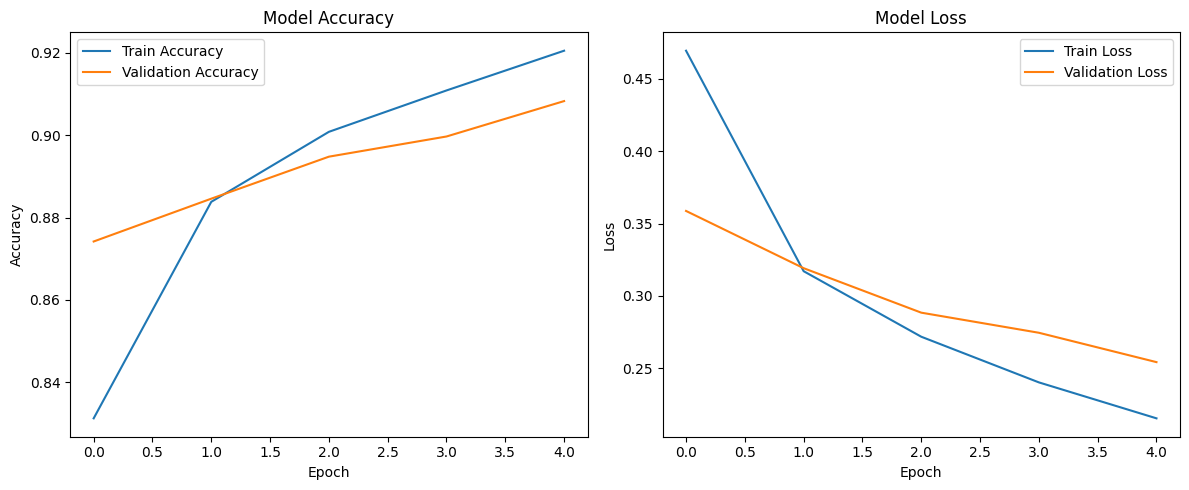

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load Fashion MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize and reshape
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# Build the same CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile and train
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Evaluate
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Final Accuracy: {accuracy * 100:.2f}%")

# Plot training results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.show()
